In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from pyFashion.fashion_analyzer import FashionAnalyzer
from newspaper import Article
import os


In [5]:
from newspaper import Article
import os

def get_article_content(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.title, article.text

def save_to_text_file(content_list, output_directory='output', output_file_name='output.txt'):
    os.makedirs(output_directory, exist_ok=True)
    output_path = os.path.join(output_directory, output_file_name)
    
    with open(output_path, 'w', encoding='utf-8') as file:
        for title, raw_text in content_list:
            file.write(f"Title: {title}\n\n{raw_text}\n\n{'=' * 80}\n\n")

In [7]:
cd C:\Users\Hp\Desktop\Data analysis

C:\Users\Hp\Desktop\Data analysis


In [8]:
# List of URLs and file names
urls_set1 = ["https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/bibhu-mohapatra",
                "https://graziamagazine.com/us/articles/nyfw-bibhu-mohapatra-ss24/",
                "https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/naeem-khan",
                "https://resident.com/2023/09/30/naeem-khan-ss24-collection-nyfw/",
                "https://www.lifestyleasia.com/ind/style/fashion/lsa-fashion-files-archana-kochhars-presentation-anant-at-nyfw/",
                "https://www.harpersbazaar.in/fashion/story/mayyur-girotras-first-ready-to-wear-capsule-is-genderfluid-and-celebrates-indian-art-633200-2023-08-17",
                ]

file_name_set1 = 'Newyork.txt'

urls_set2 = ["https://www.vogue.in/content/at-london-fashion-week-indian-designers-shone-bright",
"https://www.theguardian.com/fashion/2023/mar/19/my-designs-create-joy-and-im-grateful-for-that-ashish-gupta-fashion-sequins",     
"https://www.vogue.com/fashion-shows/spring-2023-ready-to-wear/supriya-lele#review",
"https://www.harpersbazaar.com/fashion/fashion-week/a45224620/supriya-lele-london-fashion-week-spring-2024/",
"https://www.harpersbazaar.in/fashion/story/ahead-of-his-second-showcase-at-london-fashion-week-2023-designer-harri-talks-about-what-it-takes-to-drop-a-viral-collection-565168-2023-02-13",
"https://graziamagazine.com/articles/ahluwalia-fw-23/#:~:text=Debuting%20as%20part%20of%20London,most%20influenced%20the%20designer's%20childhood.",
"https://www.vogue.com/fashion-shows/fall-2023-ready-to-wear/ahluwalia-studio",
]
file_name_set2 = 'London.txt'

urls_set3 = [ "https://www.vogue.com/fashion-shows/fall-2023-couture/rahul-mishra",
"https://www.vogue.in/fashion/content/first-look-gaurav-gupta-showcases-couture-in-paris-for-the-first-time",
"https://www.firstpost.com/entertainment/from-rahul-mishra-to-gaurav-gupta-indian-fashion-designers-who-showed-their-collections-at-paris-haute-couture-week-12165582.html#:~:text=The%20names%20are%20Gaurav%20Gupta%2C%20Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.&text=Did%20you%20know%20it%20took,Rahul%20Mishra%2C%20and%20Vaishali%20Shadangule.",
"https://www.lifestyleasia.com/ind/style/fashion/gaurav-gupta/",
"https://www.scmp.com/lifestyle/fashion-beauty/article/3210117/luxury-fashions-worst-kept-secret-and-indian-designers-reclaiming-what-it-means-make-haute-couture",
]
file_name_set3 = 'Paris.txt'

# Process each set of URLs and save to a text file
content_list_set1 = [get_article_content(url) for url in urls_set1]
save_to_text_file(content_list_set1, output_directory='fashion analysis', output_file_name=file_name_set1)

content_list_set2 = [get_article_content(url) for url in urls_set2]
save_to_text_file(content_list_set2, output_directory='fashion analysis', output_file_name=file_name_set2)

content_list_set3 = [get_article_content(url) for url in urls_set3]
save_to_text_file(content_list_set3, output_directory='fashion analysis', output_file_name=file_name_set3)

In [11]:
cd C:\Users\Hp\Desktop\Data analysis\fashion analysis

C:\Users\Hp\Desktop\Data analysis\fashion analysis


Fashion Frequency Terms:
pleats: 1
tailoring: 1
fringe: 1
black: 4
lace: 1
drape: 1
beading: 2
embroidery: 4
sari: 4
silver: 1
yellow: 1
sheer: 2
sequined: 2
felt: 3
tulle: 1
overlay: 1
pink: 3
cobalt: 2
canvas: 1
brocade: 2
orange: 1
blue: 1
green: 1
madras: 1


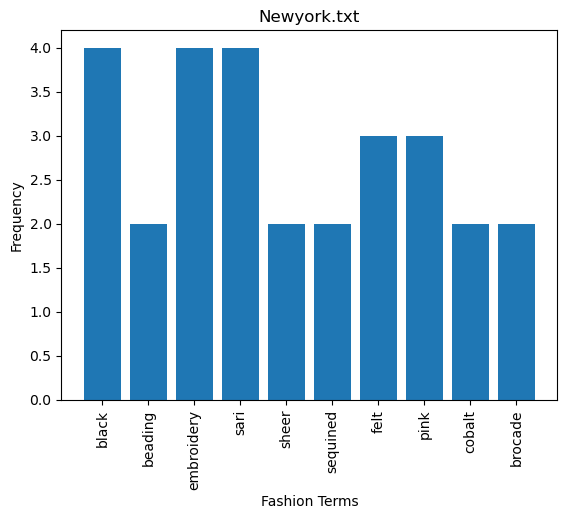



Fashion Frequency Terms:
green: 1
white: 4
sari: 5
chiffon: 1
blue: 1
sequin: 3
sequins: 11
sequined: 1
embroidery: 2
pink: 1
red: 2
brown: 1
velour: 1
felt: 3
golden: 1
orange: 1
silver: 1
black: 5
fishnet: 2
sheer: 2
drape: 2
jersey: 1
fringe: 1
ruching: 1
leather: 3
violet: 1
micro: 1
handmade: 1
tailoring: 1
denim: 3
ruffle: 1
tailored: 1


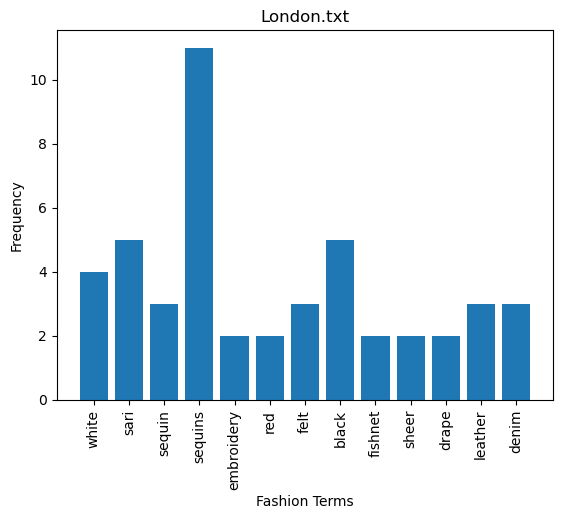



Fashion Frequency Terms:
embroidery: 6
tailored: 1
sequined: 2
red: 3
handmade: 3
futuristic: 2
sartorial: 1
tapestry: 1
brocade: 1
appliqué: 1


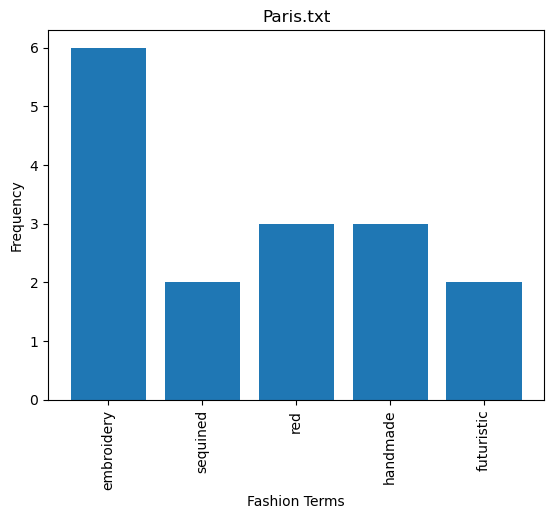

In [12]:
fashion_analyzer = FashionAnalyzer()

# List of file names
file_names = ['Newyork.txt', 'London.txt', 'Paris.txt']

for file_name in file_names:
    
    sample = pd.read_csv(file_name, header=None, names=['Text'], sep='\t', lineterminator='\n', encoding='utf-8')

    
    text_column = sample['Text']

    # Analyze the fashion text
    term_counts = fashion_analyzer.analyze_fashion_text(text_column.str.cat(sep=' '))

    # Filter terms appearing more than once
    frequent_terms = {term: count for term, count in term_counts.items() if count > 1}

    # Plot bar graph for frequent terms
    if frequent_terms:
        terms, counts = zip(*frequent_terms.items())
        plt.bar(terms, counts)
        plt.xlabel('Fashion Terms')
        plt.ylabel('Frequency')
        plt.title(f'{file_name}')
        plt.xticks(rotation='vertical')
        plt.show()

    # Add a gap between file outputs
    print("\n" + "=" * 80 + "\n")
